<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Reshape images for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Step 3: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [ ]:
# Step 4: Build the optimized CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 5: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 6: Define callbacks for optimization
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# It almost stopped at 95% and learning rate decreased at epoch 2
# at epoch 7 accuracy dropped to 97% after reaching to 98%

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 111s 115ms/step - accuracy: 0.7686 - loss: 0.7676 - val_accuracy: 0.9853 - val_loss: 0.0453 - learning_rate: 0.0010
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 114ms/step - accuracy: 0.9587 - loss: 0.1361 - val_accuracy: 0.9878 - val_loss: 0.0364 - learning_rate: 0.0010
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 115ms/step - accuracy: 0.9699 - loss: 0.0981 - val_accuracy: 0.9891 - val_loss: 0.0307 - learning_rate: 0.0010
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 106s 113ms/step - accuracy: 0.9763 - loss: 0.0794 - val_accuracy: 0.9920 - val_loss: 0.0242 - learning_rate: 0.0010
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 106s 113ms/step - accuracy: 0.9785 - loss: 0.0709 - val_accuracy: 0.9927 - val_loss: 0.0238 - learning_rate: 0.0010
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 105s 112ms/step - accuracy: 0.9812 - loss: 0.0639 - val_accuracy: 0.9917 - val_loss: 0.0268 - learning_rate: 0.0010
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 107s 114ms/step - accuracy: 0.9806 

In [12]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 108s 115ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9964 - val_loss: 0.0124 - learning_rate: 2.5000e-04
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 108s 115ms/step - accuracy: 0.9919 - loss: 0.0278 - val_accuracy: 0.9964 - val_loss: 0.0122 - learning_rate: 2.5000e-04
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 116ms/step - accuracy: 0.9921 - loss: 0.0237 - val_accuracy: 0.9965 - val_loss: 0.0113 - learning_rate: 2.5000e-04
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 109s 116ms/step - accuracy: 0.9928 - loss: 0.0239 - val_accuracy: 0.9962 - val_loss: 0.0129 - learning_rate: 2.5000e-04
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 108s 115ms/step - accuracy: 0.9930 - loss: 0.0253 - val_accuracy: 0.9968 - val_loss: 0.0111 - learning_rate: 2.5000e-04
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 108s 115ms/step - accuracy: 0.9931 - loss: 0.0224 - val_accuracy: 0.9969 - val_loss: 0.0112 - learning_rate: 2.5000e-04
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
# Step 8: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Optimized - Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9952 - loss: 0.0127
Optimized - Test accuracy: 0.9966, Test loss: 0.0103


In [14]:
# Step 9: Visualize training progress
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

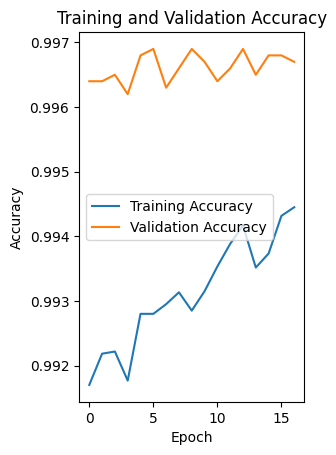

In [15]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

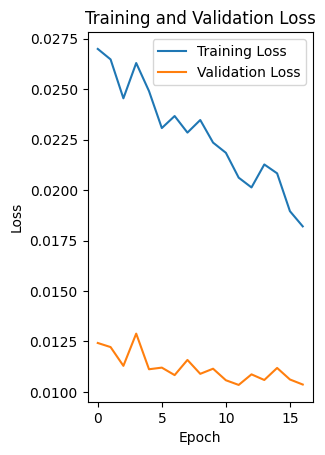

In [16]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>